In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# dir(pandas.io)
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,83.756093,81.499134,82.592549,82.727756,1.521817e+08,82.440270
std,19.658679,18.841266,19.435358,19.231089,7.241298e+07,19.386772
min,56.947498,53.152500,56.757500,56.092499,3.247000e+07,55.840385
25%,67.812502,66.350002,67.000624,67.099375,1.028688e+08,66.720016
50%,79.193748,77.483749,78.093750,78.011250,1.354088e+08,77.673397
75%,95.148752,93.421877,94.098125,94.473124,1.819537e+08,94.303091
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,134.179993


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-10-09 to 2020-10-09
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


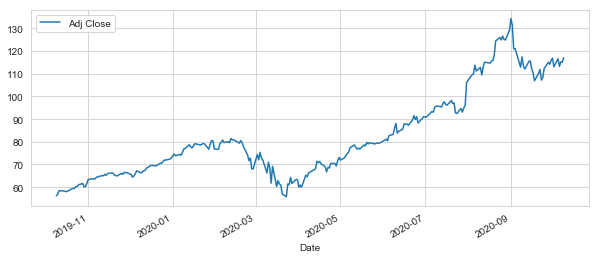

In [10]:
#closing stock price over 1 year 
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

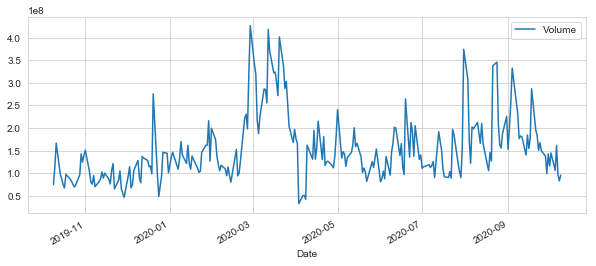

In [11]:
#total volume of stock traded each day over 1 year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
#moving average for the stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

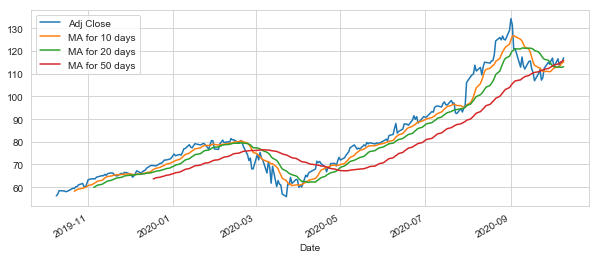

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

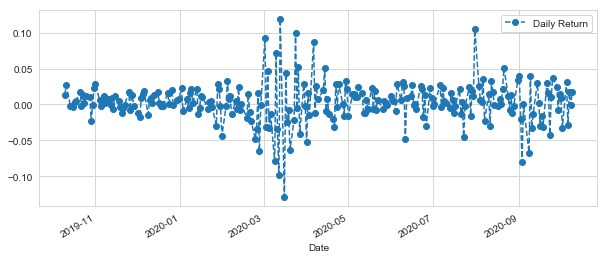

In [14]:
#daily returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Igor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


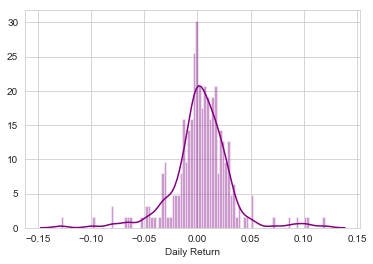

In [15]:
#average daily returns
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

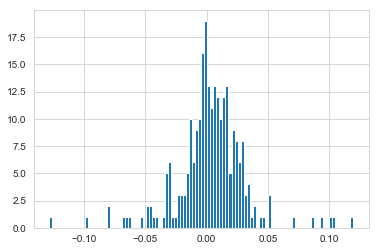

In [16]:
#using pandas
AAPL['Daily Return'].hist(bins=100)

In [17]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-10-09,56.199894,1721.989990,1202.310059,136.683914
2019-10-10,56.957375,1720.260010,1208.670044,137.534241
2019-10-11,58.472343,1731.920044,1215.449951,138.107697
2019-10-14,58.388180,1736.430054,1217.140015,137.979172
2019-10-15,58.252033,1767.380005,1243.010010,139.976440


In [18]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-10-09,NaN,NaN,NaN,NaN
2019-10-10,0.013478,-0.001005,0.005290,0.006221
2019-10-11,0.026598,0.006778,0.005609,0.004170
2019-10-14,-0.001439,0.002604,0.001390,-0.000931
2019-10-15,-0.002332,0.017824,0.021255,0.014475


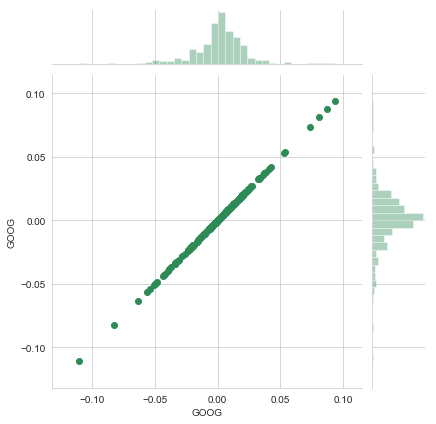

In [19]:
#how 2 stocks are correlated (compare google to itself)
sns.jointplot('GOOG', 'GOOG', tech_rets,kind= 'scatter',color='seagreen')

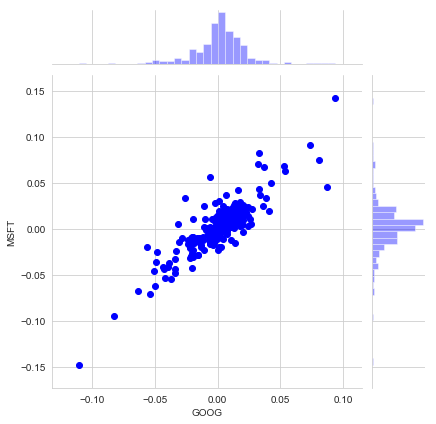

In [20]:
#how 2 stocks are correlated (compare google to MSFT)
sns.jointplot('GOOG', 'MSFT', tech_rets,kind= 'scatter',color='blue')

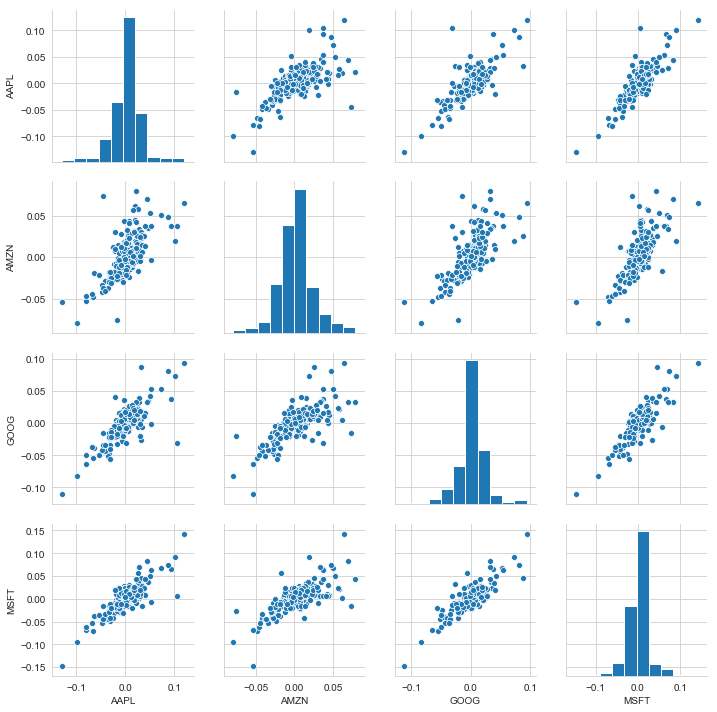

In [21]:
#stocks daily return (histogram)
# correlation scatter plot between stocks
sns.pairplot(tech_rets.dropna())

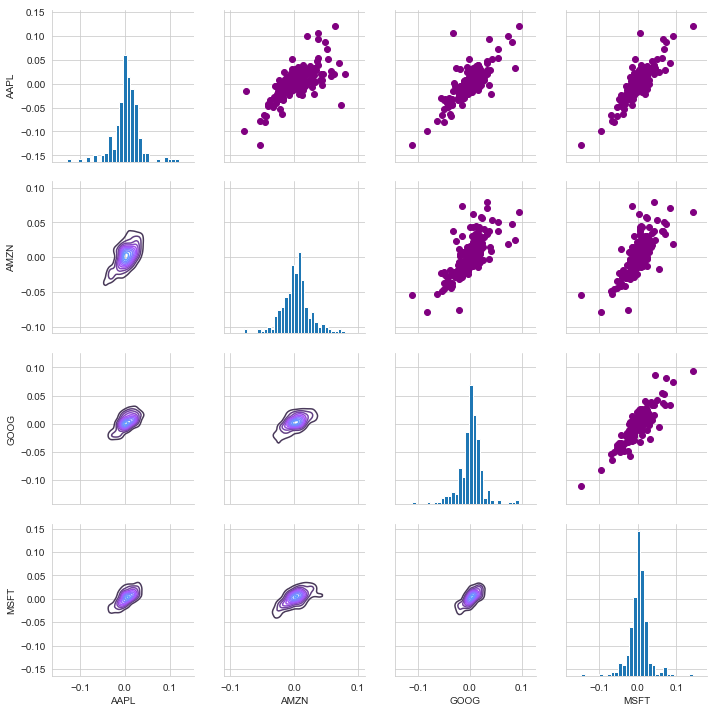

In [22]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

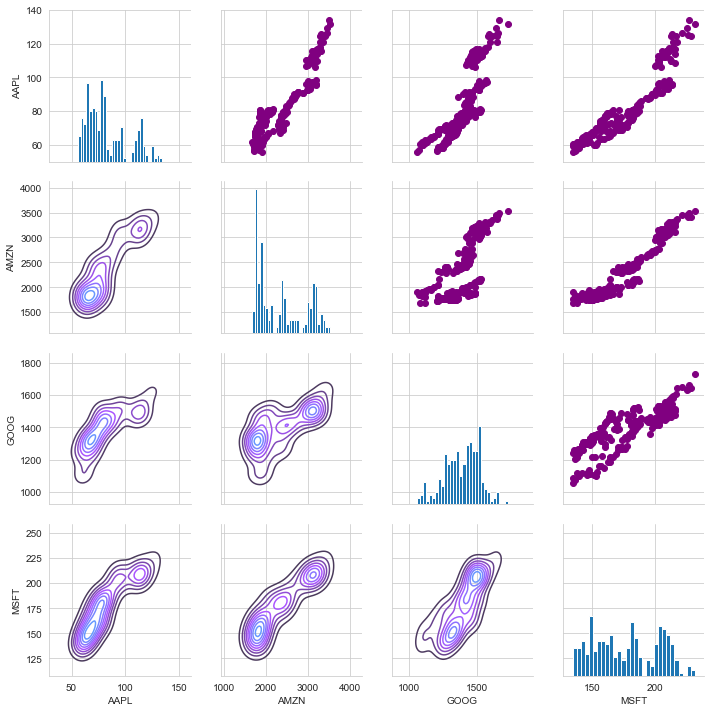

In [23]:
#closing price
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

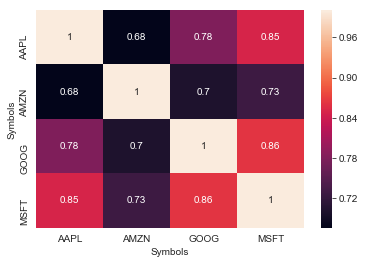

In [24]:
#correlation plot for daily returns

sns.heatmap(data = tech_rets.corr(), annot=True)

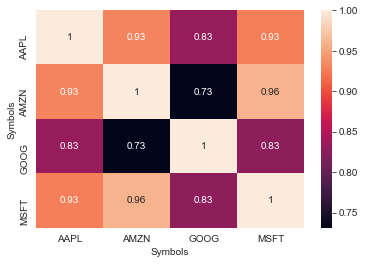

In [25]:
sns.heatmap(data = closing_df.corr(), annot=True)

In [26]:
#risk analysis
rets = tech_rets.dropna()

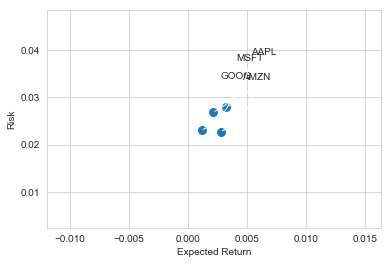

In [27]:
area=np.pi * 20
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y),xytext = (50,50), textcoords = 'offset points', ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

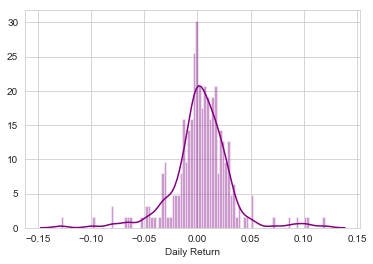

In [28]:
#value at risk
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [30]:
rets['AAPL'].quantile(0.05)

-0.04161985444024205

In [32]:
#value at risk using Monte Carlo method
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [33]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

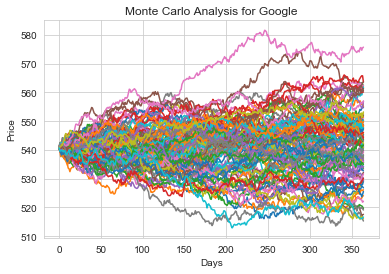

In [34]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [36]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

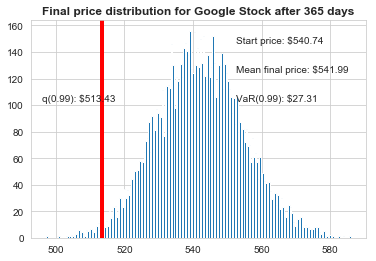

In [41]:
q = np.percentile(simulation,1)
plt.hist(simulation,bins=200)

#starting price
plt.figtext(0.6,0.8,s='Start price: $%.2f' %start_price)

#mean ending price
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulation.mean())

#Variance of hte price (within 99% confidence interval)
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#Title
plt.title('Final price distribution for Google Stock after %s days' %days, weight='bold')